<img src="kit_logo.jpg" width="200" height="200" align="right"/>

##### Lehrstuhl für Analytics and Statistics (IOR)
##### Prof. Dr. Oliver Grothe
##### SS 2020


# Multivariate Verfahren
## Übung 3


#### Aufgabe 2
Verwenden Sie den Datensatz iris aus Ilias. Dieser enthält vier Merkmale von
Blütenblättern unterschiedlicher Schwertlilienarten (jeweils Länge und Breite des Sepalum
(Kelchblatt) und Petalum(Kronblatt)). Führen Sie eine Multiple Lineare Regression durch,
um aus Länge und Breite des Kelchblatts auf die Länge des Kronblatts schließen zu können.
Interpretieren Sie die Koeffizienten. Sind diese signifikant? Wie beurteilen Sie die Güte der
Regression insgesamt?

#### Datenvorbereitung

- Daten einlesen:

In [10]:
import numpy as np
import pandas as pd
import math
import scipy.stats as st
import statsmodels.api as sm
df = pd.read_csv("./iris.csv",sep=',',header=None )
df.head()



,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- Aufteilen in linke und rechte Seite, erstellen der Designmatrix:

In [11]:
df=pd.DataFrame.to_numpy(df)
y=df[:,2] 
x=df[:,:2]
x[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

- $\mathbf{1}$-Vektor hinzufügen

In [12]:
# add 1 vector to x for regression with intercept 𝑏₀ 
x=sm.add_constant(x)
x[:10]

array([[1. , 5.1, 3.5],
       [1. , 4.9, 3. ],
       [1. , 4.7, 3.2],
       [1. , 4.6, 3.1],
       [1. , 5. , 3.6],
       [1. , 5.4, 3.9],
       [1. , 4.6, 3.4],
       [1. , 5. , 3.4],
       [1. , 4.4, 2.9],
       [1. , 4.9, 3.1]])

#### Multiple Lineare Regression

- Modell festlegen, anpassen und anzeigen:

In [13]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     482.0
Date:                Wed, 20 May 2020   Prob (F-statistic):           2.74e-65
Time:                        09:52:16   Log-Likelihood:                -145.89
No. Observations:                 150   AIC:                             297.8
Df Residuals:                     147   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5248      0.563     -4.481      0.0

- Plot der orignalen Daten und geschätztes Modell

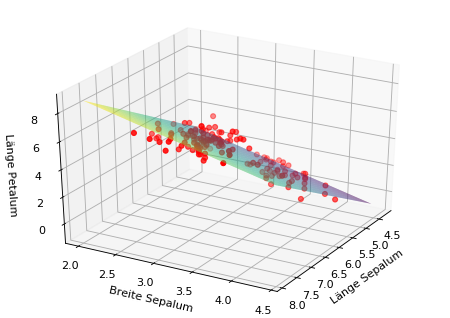

In [14]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x1 = df[:,0]
x2 = df[:,1]
x3 = df[:,2]
ax.scatter3D(x1, x2, x3,c='r')

# caulate data for hyperplane
x1fit=np.arange (min(x1), max(x1),0.1 )
x2fit=np.arange (min(x2), max(x2),0.1 )
x1Fit, x2Fit = np.meshgrid(x1fit, x2fit)
b=results.params
yFit = b[0] + b[1]*x1Fit + b[2]*x2Fit

ax.plot_surface(x1Fit, x2Fit, yFit,cmap=cm.viridis,alpha=.6,)
ax.set_xlabel('Länge Sepalum')
ax.set_ylabel('Breite Sepalum')
ax.set_zlabel('Länge Petalum')

ax.view_init(None, 30)
plt.show()
    

-  interactive Plot 

In [15]:
# use plotly to show interactive graph

# if no plotly is available please run:
# !pip install cufflinks plotly
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=x1, y=x2, z=y, mode='markers',marker_size=4)])
reference_line =go.Surface( z=yFit,x=x1Fit, y=x2Fit,opacity=0.8)
fig.add_trace(reference_line)
fig.update_layout(scene_aspectmode='manual',scene_aspectratio=dict(x=1, y=1, z=0.5))
fig.update_layout(scene = dict(
                xaxis_title='Länge Sepalum',
                yaxis_title='Breite Sepalum',
                zaxis_title='Länge Petalum'),
                margin=dict(r=20, b=10, l=10, t=10))
fig.show()



### Exkurs

In [16]:
# different simple regressions  

model_1 = sm.OLS(y, x[:,:2]) # nehme nur erstes Merkmal
results_1 = model_1.fit()
b_1=results_1.params #speichere Parameter
y1fit = b_1[0] + b_1[1]*x1fit #Mache Vorhersage für alle Werte in x1fit
r1=results_1.resid #speichere residuen
print(results_1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.04e-47
Time:                        09:53:05   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1014      0.507    -14.016      0.0

In [17]:
model_2 = sm.OLS(y, x[:,[0,2]]) #Regression nur mit zweitem Merkmal
results_2 = model_2.fit()
b_2=results_2.params
y2fit = b_2[0] + b_2[1]*x2fit 
r2=results_2.resid
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     33.28
Date:                Wed, 20 May 2020   Prob (F-statistic):           4.51e-08
Time:                        09:53:21   Log-Likelihood:                -282.38
No. Observations:                 150   AIC:                             568.8
Df Residuals:                     148   BIC:                             574.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0632      0.929      9.757      0.0

In [18]:
model_xx = sm.OLS(x[:,2], x[:,:2]) # Regressiere auf  zweites Merkmal durch erstes
results_xx = model_xx.fit()
b_xx=results_xx.params
yxxfit = b_xx[0] + b_xx[1]*x1fit 
rxx=results_xx.resid
rxxfit = np.arange (min(rxx),max(rxx),0.1)
print(results_xx.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Wed, 20 May 2020   Prob (F-statistic):              0.152
Time:                        09:54:13   Log-Likelihood:                -86.732
No. Observations:                 150   AIC:                             177.5
Df Residuals:                     148   BIC:                             183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4189      0.254     13.484      0.0

In [30]:
model_res = sm.OLS(r1,rxx) # Regressiere auf Residuen von 1 mit Residuen von 2
results_res = model_res.fit()
bres=results_res.params
yresfit = bres*rxxfit
print(results_res.summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.445
Method:                 Least Squares   F-statistic:                              121.3
Date:                Tue, 19 May 2020   Prob (F-statistic):                    5.16e-21
Time:                        14:43:41   Log-Likelihood:                         -145.89
No. Observations:                 150   AIC:                                      293.8
Df Residuals:                     149   BIC:                                      296.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

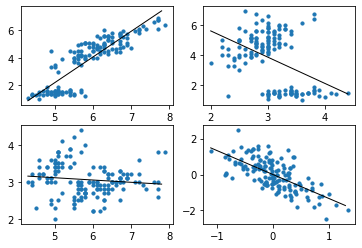

In [37]:
# plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# change the title name 
#fig.suptitle('title')
ax1.scatter(x1, y,s=10)
ax1.plot(x1fit,y1fit,'k',linewidth=1)
ax2.scatter(x2, y,s=10)
ax2.plot(x2fit,y2fit,'k',linewidth=1)
ax3.scatter(x1, x2,s=10)
ax3.plot(x1fit,yxxfit,'k',linewidth=1)
ax4.scatter(rxx,r1,s=10)
ax4.plot(rxxfit,yresfit,'k',linewidth=1)
plt.show()
